In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv('/content/healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [62]:
df.drop(columns=['Name', 'Doctor', 'Hospital', 'Room Number', 'Date of Admission', 'Discharge Date'], inplace=True)
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Insurance Provider  55500 non-null  object 
 5   Billing Amount      55500 non-null  float64
 6   Admission Type      55500 non-null  object 
 7   Medication          55500 non-null  object 
 8   Test Results        55500 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.8+ MB


In [64]:
df.describe()

,Age,Billing Amount
count,55500.000000,55500.000000
mean,51.539459,25539.316097
std,19.602454,14211.454431
min,13.000000,-2008.492140
25%,35.000000,13241.224652
50%,52.000000,25538.069376
75%,68.000000,37820.508436
max,89.000000,52764.276736


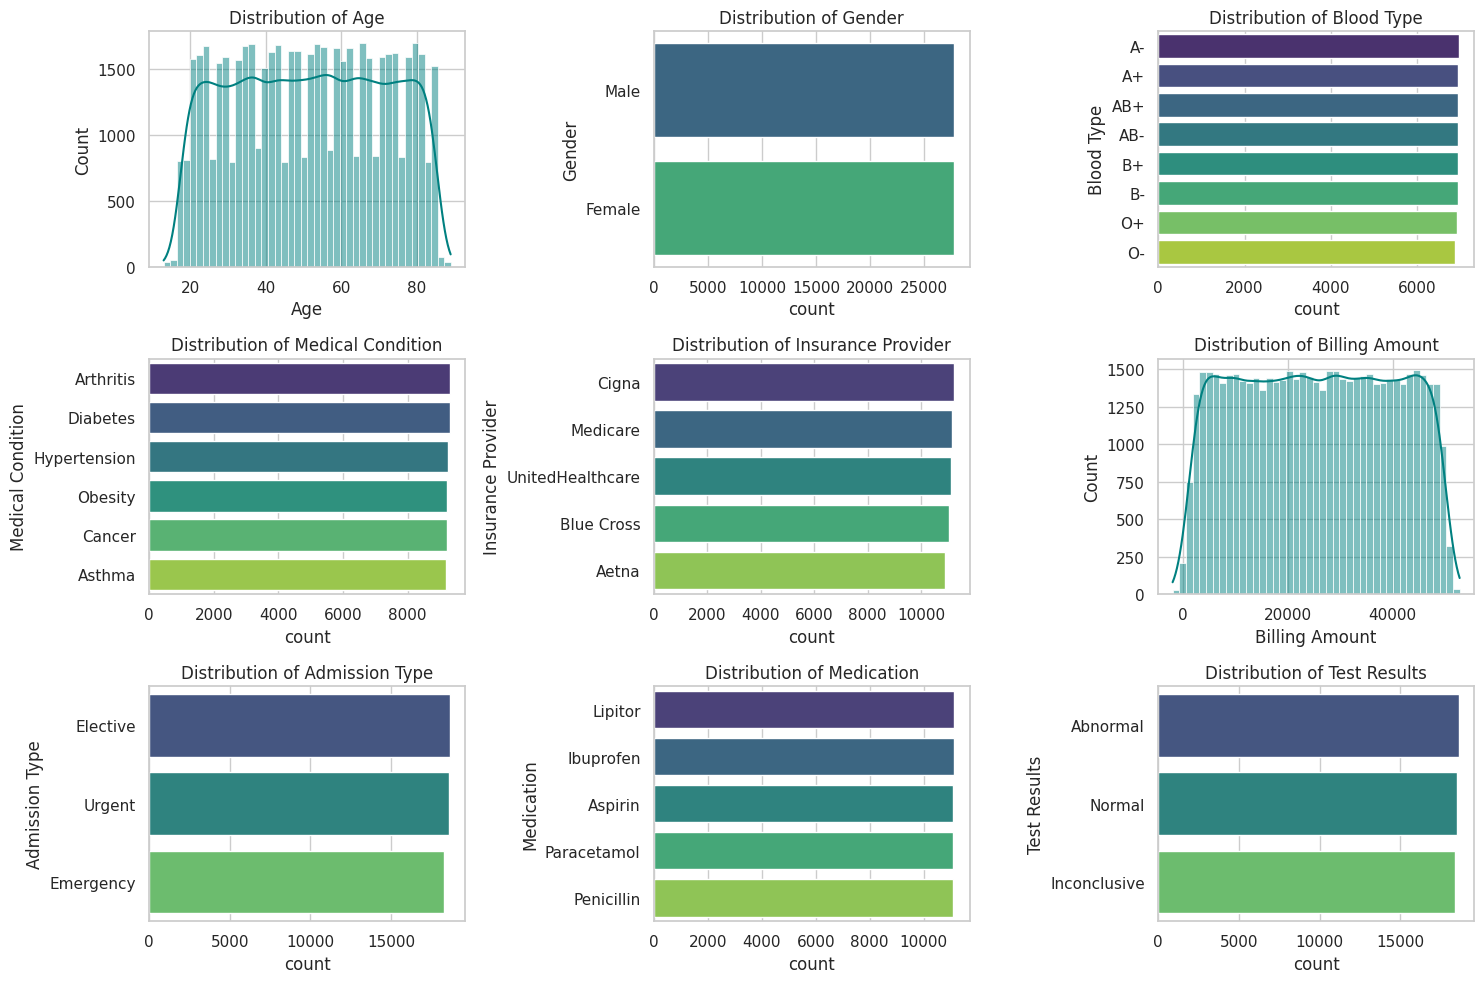

In [65]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    if df[column].dtype == 'object':
        sns.countplot(y=df[column], order=df[column].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {column}')
    else:
        sns.histplot(df[column], kde=True, color='teal')
        plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

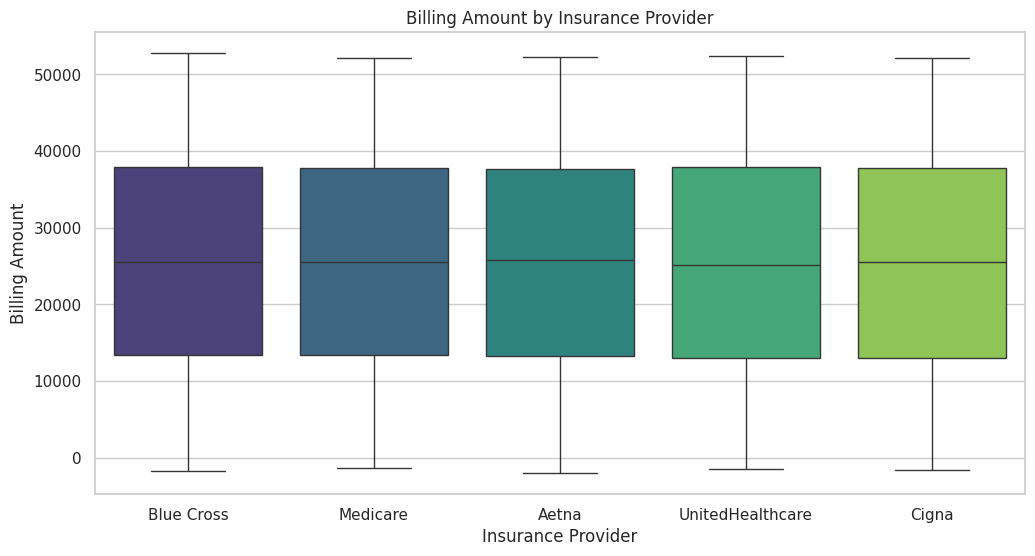

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Insurance Provider', y='Billing Amount', palette='viridis')
plt.title('Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.show()

In [67]:
cat_cols = df.select_dtypes(include = ['object']).columns

le = LabelEncoder()
for col in cat_cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])


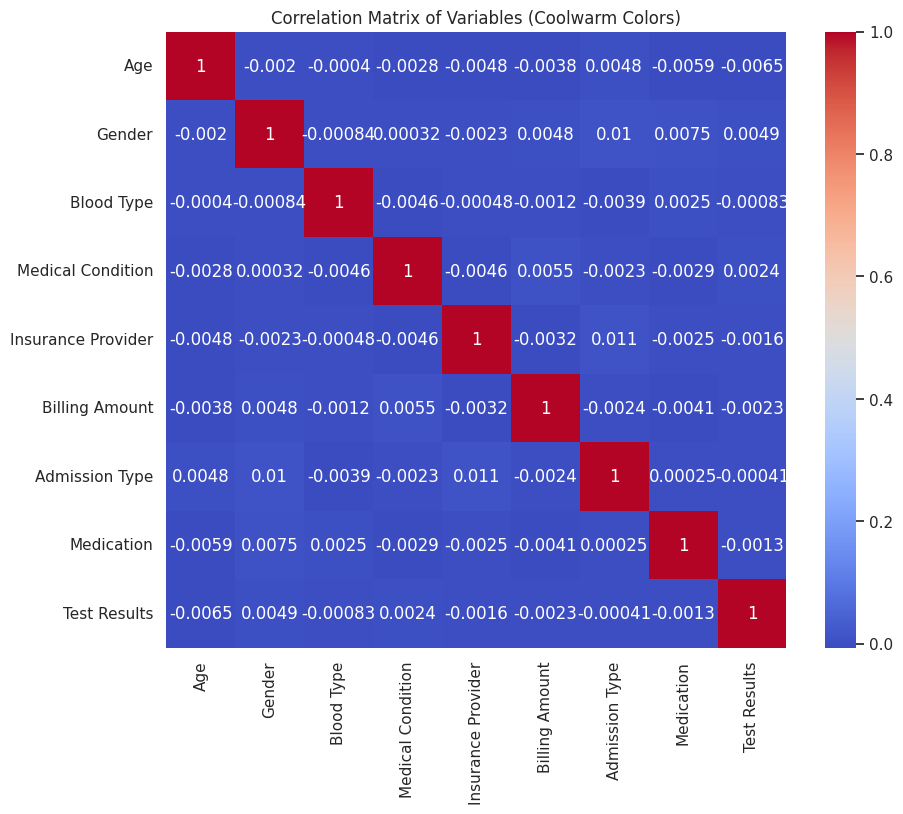

In [68]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables (Coolwarm Colors)')
plt.show()

In [69]:
print(df['Test Results'].value_counts())

Test Results
0    18627
2    18517
1    18356
Name: count, dtype: int64


In [70]:
# Separating features and target variable
X = df.drop('Test Results', axis=1)
y = df['Test Results']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
xtrain_standardized = scaler.fit_transform(xtrain)
xtest_standardized = scaler.transform(xtest)

# Initializing the KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(xtrain_standardized, ytrain)

ypred = knn.predict(xtest_standardized)

In [71]:
class_names = ['Normal', 'Abnormal', 'Inconclusive']

print('Classification Report\n')
print(classification_report(ytest, ypred, target_names=class_names))


Classification Report

              precision    recall  f1-score   support

      Normal       0.38      0.52      0.44      3758
    Abnormal       0.40      0.33      0.36      3669
Inconclusive       0.39      0.31      0.35      3673

    accuracy                           0.39     11100
   macro avg       0.39      0.39      0.38     11100
weighted avg       0.39      0.39      0.38     11100



In [72]:
# Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(xtrain_standardized, ytrain)
ypred_rf = rf.predict(xtest_standardized)


# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(xtrain_standardized, ytrain)
ypred_lr = lr.predict(xtest_standardized)

# Support Vector Machine
svm = SVC(random_state=0)
svm.fit(xtrain_standardized, ytrain)
ypred_svm = svm.predict(xtest_standardized)


In [73]:
class_names = ['Normal', 'Abnormal', 'Inconclusive']


print("KNN Classification Report\n", classification_report(ytest, ypred, target_names=class_names))
print("\nRandom Forest Classification Report\n", classification_report(ytest, ypred_rf, target_names=class_names))
print("\nLogistic Regression Classification Report\n", classification_report(ytest, ypred_lr, target_names=class_names))
print("\nSVM Classification Report\n", classification_report(ytest, ypred_svm, target_names=class_names))

KNN Classification Report
               precision    recall  f1-score   support

      Normal       0.38      0.52      0.44      3758
    Abnormal       0.40      0.33      0.36      3669
Inconclusive       0.39      0.31      0.35      3673

    accuracy                           0.39     11100
   macro avg       0.39      0.39      0.38     11100
weighted avg       0.39      0.39      0.38     11100


Random Forest Classification Report
               precision    recall  f1-score   support

      Normal       0.43      0.44      0.44      3758
    Abnormal       0.44      0.43      0.43      3669
Inconclusive       0.44      0.43      0.43      3673

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100


Logistic Regression Classification Report
               precision    recall  f1-score   support

      Normal       0.33      0.33      0.33      3758
    Abnormal       0

In [74]:
results = {
    'Model': ['KNN', 'Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(ytest, ypred),
        accuracy_score(ytest, ypred_rf),
        accuracy_score(ytest, ypred_lr),
        accuracy_score(ytest, ypred_svm)
    ]
}

results_df = pd.DataFrame(results)
print("\nModel Comparison\n", results_df)



Model Comparison
                  Model  Accuracy
0                  KNN  0.387838
1        Random Forest  0.433784
2  Logistic Regression  0.329369
3                  SVM  0.335766
